[PCCP 모의고사 #2] 3번 - [카페 확장](https://school.programmers.co.kr/learn/courses/20848/lessons/255906)

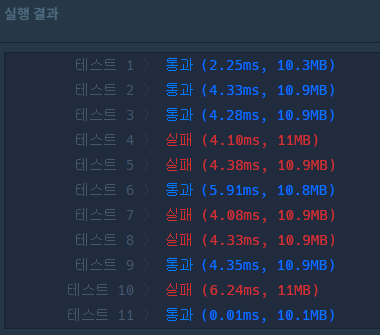

In [60]:
def solution(menu, order, k):
    answer = 0
    
    # check할 시간 리스트업
    in_times = [k*i for i in range(len(order))]
    out_times = []
    out_time = 0
    for o in order :
        out_time += menu[o]
        out_times.append(out_time)
    
    in_times.reverse(), out_times.reverse()
    
    num_people = 0
    next_in = in_times.pop()
    next_out = out_times.pop()

    while in_times or out_times:
        if next_out == next_in:
            next_in = in_times.pop() if in_times else next_in
            next_out = out_times.pop() if out_times else next_out
            continue
        elif next_out > next_in :
            num_people += 1
            if in_times:
                next_in = in_times.pop()
            else :
                next_out = out_times.pop()
                next_in = out_times[0] if out_times else next_out
        else :
            num_people -= 1
            if out_times:
                next_out = out_times.pop()
            else :
                next_in = in_times.pop()
                next_out = in_times[0] if in_times else next_in
        if num_people > answer:
            answer = num_people        
    
    return answer

- out time을 계산할 때, 들어온 시간과 이전 메뉴 제작 종료 시간 중 늦은 시간으로 지정하는 과정을 빠뜨림
- 코드를 수정하는 김에 조금 더 간단한 코드로 업데이트

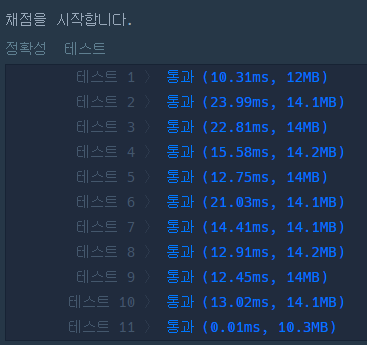

In [102]:
def solution(menu, order, k):
    events = []
    out_time = 0
    for i, o in enumerate(order):
        out_time = max(k*i, out_time) + menu[o]
        events.append([out_time, -1])
    events += [[i*k, +1] for i in range(len(order))]
    events = sorted(events, key=lambda x:(x[0], x[1]))
    answer = 0
    cnt_people = 0
    for (time, score) in events:
        cnt_people += score
        if cnt_people > answer:
            answer = cnt_people
    
    return answer

In [104]:
menu = [5, 12, 30]
order = [1,2,0,1]
k = 10
solution(menu, order, k)

[[0, 1], [10, 1], [12, -1], [20, 1], [30, 1], [42, -1], [47, -1], [59, -1]]


3

In [105]:
menu = [5, 12, 30]
order = [2, 1, 0, 0, 0, 1, 0]
k = 10
solution(menu, order, k)

[[0, 1], [10, 1], [20, 1], [30, -1], [30, 1], [40, 1], [42, -1], [47, -1], [50, 1], [52, -1], [57, -1], [60, 1], [69, -1], [74, -1]]


4

In [106]:
menu = [5]
order = [0, 0, 0, 0, 0]
k = 5
solution(menu, order, k)

[[0, 1], [5, -1], [5, 1], [10, -1], [10, 1], [15, -1], [15, 1], [20, -1], [20, 1], [25, -1]]


1